<a href="https://colab.research.google.com/github/beseka/logisticregression-ridge/blob/main/CS412_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Homework 2: Part 1

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

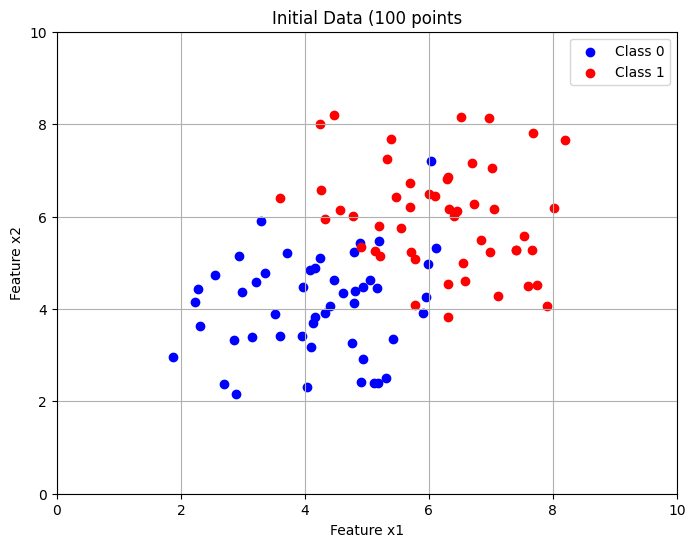

In [2]:
############# DO NOT CHANGE THIS PART #############

import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(n_points_per_class, seed):
    """
    Generates a 2-class dataset with 2 features.
    The classes are Gaussian clusters that have some overlap.

    Args:
    n_points_per_class (int): Number of points for class 0 and class 1
    seed (int): Random seed for reproducibility

    Returns:
    X (ndarray): (n_points*2, 2) array of features
    y (ndarray): (n_points*2,) array of labels (0 or 1)
    """
    np.random.seed(seed)

    # Class 0 properties: Centered at (4, 4)
    mean_0 = [4, 4]
    # Covariance matrix: [[var_x, cov_xy], [cov_xy, var_y]]
    # This creates an elliptical cluster
    cov_0 = [[1.5, 0.5], [0.5, 1.5]]

    # Class 1 properties: Centered at (6, 6)
    mean_1 = [6, 6]
    # This cluster slants the other way
    cov_1 = [[1.5, -0.5], [-0.5, 1.5]]

    # Generate the points
    class_0_x = np.random.multivariate_normal(mean_0, cov_0, n_points_per_class)
    class_1_x = np.random.multivariate_normal(mean_1, cov_1, n_points_per_class)

    # Combine into X and y
    X = np.concatenate((class_0_x, class_1_x))
    y = np.array([0]*n_points_per_class + [1]*n_points_per_class)

    return X, y

# Dataset generation
seed = 42
n_points_total = 100
n_per_class = n_points_total // 2

X, y = generate_dataset(n_points_per_class=n_per_class, seed=seed)

# Displat the dataset
title = f"Initial Data ({n_points_total} points"
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

plt.xlim(0, 10) # Adjusted for new data
plt.ylim(0, 10) # Adjusted for new data
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.title(title)
plt.grid(True)
plt.show()

############# DO NOT CHANGE THIS PART #############

# Machine Learning - Homework 2: Part 2

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

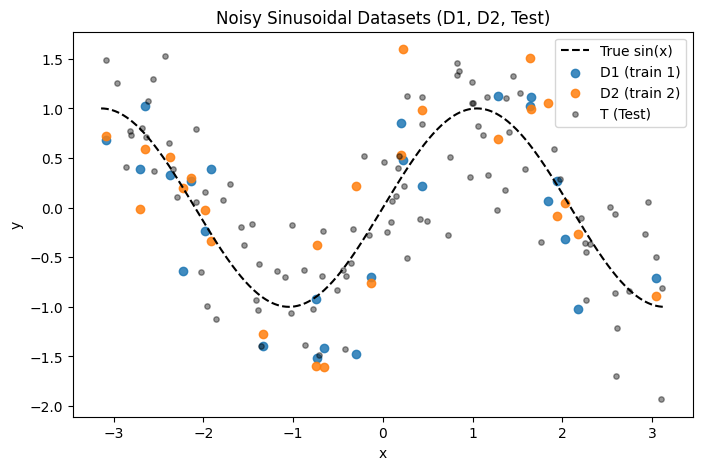

In [3]:
############# DO NOT CHANGE THIS PART #############

import numpy as np
import matplotlib.pyplot as plt

# Initial configurations
N_train = 25                 # points in D1 and D2
N_test = 100                 # points in test set
sigma = 0.5                 # standard deviation of noise
period = 2 * np.pi           # one period of sine wave
freq = 1.5                   # frequency of the sinusoidal
start_point = -period/2
end_point = start_point + period

# Dataset generation function
def make_dataset(n_points, sigma, seed_x, seed_noise):
    rng_x = np.random.default_rng(seed_x)
    rng_n = np.random.default_rng(seed_noise)

    X = np.sort(rng_x.uniform(start_point, end_point, size=n_points))
    noise = rng_n.normal(0.0, sigma, size=n_points)
    y = np.sin(freq*X) + noise

    return X.reshape(-1, 1), y

# Create datasets
X1, y1 = make_dataset(N_train, sigma, seed_x=412955, seed_noise=412067)  # D1
X2, y2 = make_dataset(N_train, sigma, seed_x=412955, seed_noise=412085)  # D2
Xt, yt = make_dataset(N_test,  sigma, seed_x=412738, seed_noise=412222)  # Test set

# Visualize the generated data
plt.figure(figsize=(8,5))
x_true = np.linspace(start_point, end_point, 400)
y_true = np.sin(freq*x_true)

plt.plot(x_true, y_true, 'k--', label='True sin(x)')
plt.scatter(X1, y1, color='tab:blue', label='D1 (train 1)', alpha=0.85)
plt.scatter(X2, y2, color='tab:orange', label='D2 (train 2)', alpha=0.85)
plt.scatter(Xt, yt, color='black', label='T (Test)', alpha=0.4, s=15)
plt.legend()
plt.title("Noisy Sinusoidal Datasets (D1, D2, Test)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


############# DO NOT CHANGE THIS PART #############

# **Your job starts here!**


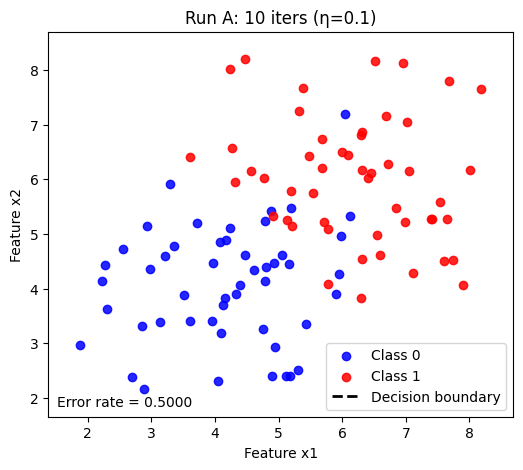

w (Run A) = [-0.0822762231018700, 0.0468235643859471, 0.0388589541017641]
Loss (Run A) = 0.668221313004
Error rate (Run A) = 0.500000000000


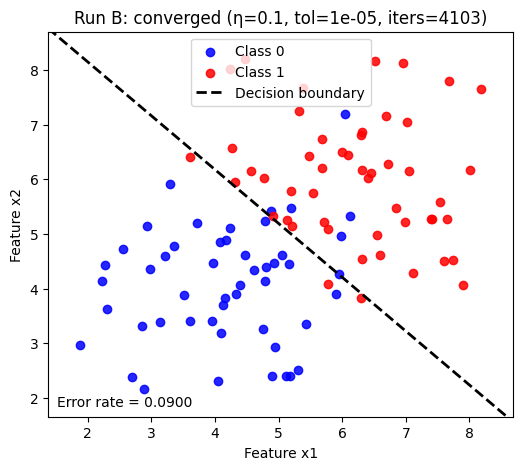

w (Run B) = [-10.5776110938711820, 1.0298969679034919, 1.0452473248884160]
Loss (Run B) = 0.262920486643
Error rate (Run B) = 0.090000000000
Iterations (Run B) = 4103


In [17]:
## Part 1 To DO
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=16, suppress=False)

def sigmoid(z):
    z = np.clip(z, -40, 40)
    return 1.0 / (1.0 + np.exp(-z))

def bce_loss(y, y_hat):
    eps = 1e-12
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def add_bias(X):
    m = X.shape[0]
    return np.c_[np.ones(m), X]

def predict_proba(X, w):
    return sigmoid(X @ w)

def gradients(X, y, y_hat):
    m = X.shape[0]
    return (X.T @ (y_hat - y)) / m

def misclass_rate(y_true, y_prob, thr=0.5):
    y_pred = (y_prob >= thr).astype(int)
    return np.mean(y_pred != y_true)

def print_w(w, prefix="w"):
    print(f"{prefix} = [{w[0]:.16f}, {w[1]:.16f}, {w[2]:.16f}]")

def plot_decision_boundary(X_raw, y, w, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.scatter(X_raw[y==0,0], X_raw[y==0,1], c='blue', label='Class 0', alpha=0.85)
    ax.scatter(X_raw[y==1,0], X_raw[y==1,1], c='red',  label='Class 1', alpha=0.85)

    x1_min, x1_max = X_raw[:,0].min()-0.5, X_raw[:,0].max()+0.5
    x2_min, x2_max = X_raw[:,1].min()-0.5, X_raw[:,1].max()+0.5
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xlabel("Feature x1")
    ax.set_ylabel("Feature x2")

    if abs(w[2]) > 1e-12:
        xs = np.linspace(x1_min, x1_max, 200)
        ys = -(w[1]/w[2]) * xs - (w[0]/w[2])
        ax.plot(xs, ys, 'k--', lw=2, label='Decision boundary')
    else:
        ax.text(0.02, 0.95, "w2 ≈ 0, doğru çizilemedi", transform=ax.transAxes, fontsize=9, va='top')

    ax.set_title(title)
    ax.legend(loc='best')
    return fig, ax

def train_fixed_iters(X_raw, y, lr=0.1, iters=10):
    Xb = add_bias(X_raw)
    w = np.zeros(Xb.shape[1])
    for _ in range(iters):
        p = predict_proba(Xb, w)
        g = gradients(Xb, y, p)
        w -= lr * g

    p = predict_proba(Xb, w)
    err = misclass_rate(y, p, 0.5)
    fig, ax = plot_decision_boundary(X_raw, y, w, f"Run A: 10 iters (η={lr})")
    ax.text(0.02, 0.02, f"Error rate = {err:.4f}", transform=ax.transAxes, fontsize=10, va='bottom')
    plt.show()
    print_w(w, "w (Run A)")
    print(f"Loss (Run A) = {bce_loss(y, p):.12f}")
    print(f"Error rate (Run A) = {err:.12f}")
    return w, err

def train_until_converged(X_raw, y, lr=0.1, tol=1e-5, max_iters=200000):
    Xb = add_bias(X_raw)
    w = np.zeros(Xb.shape[1])
    prev = np.inf
    for t in range(max_iters):
        p = predict_proba(Xb, w)
        L = bce_loss(y, p)
        if abs(prev - L) < tol:
            break
        prev = L
        g = gradients(Xb, y, p)
        w -= lr * g
    p = predict_proba(Xb, w)
    err = misclass_rate(y, p, 0.5)
    fig, ax = plot_decision_boundary(X_raw, y, w, f"Run B: converged (η={lr}, tol={tol}, iters={t+1})")
    ax.text(0.02, 0.02, f"Error rate = {err:.4f}", transform=ax.transAxes, fontsize=10, va='bottom')
    plt.show()
    print_w(w, "w (Run B)")
    print(f"Loss (Run B) = {bce_loss(y, p):.12f}")
    print(f"Error rate (Run B) = {err:.12f}")
    print(f"Iterations (Run B) = {t+1}")
    return w, err, t+1

X_raw, y_raw = X.copy(), y.astype(int).copy()

wA, errA = train_fixed_iters(X_raw, y_raw, lr=0.1, iters=10)
wB, errB, itB = train_until_converged(X_raw, y_raw, lr=0.1, tol=1e-5)


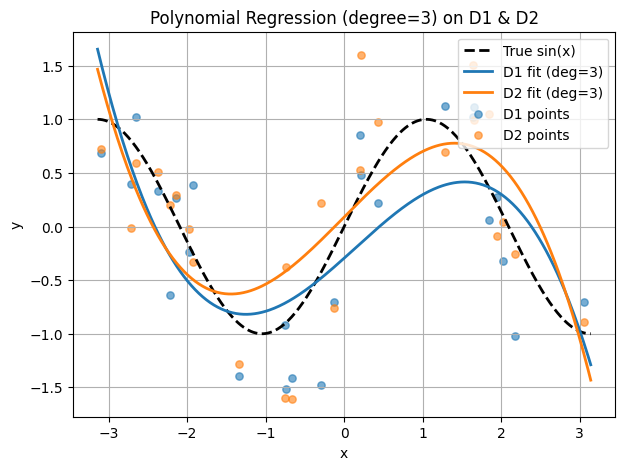

Test MSE (deg=3) — D1: 0.3758 | D2: 0.3549


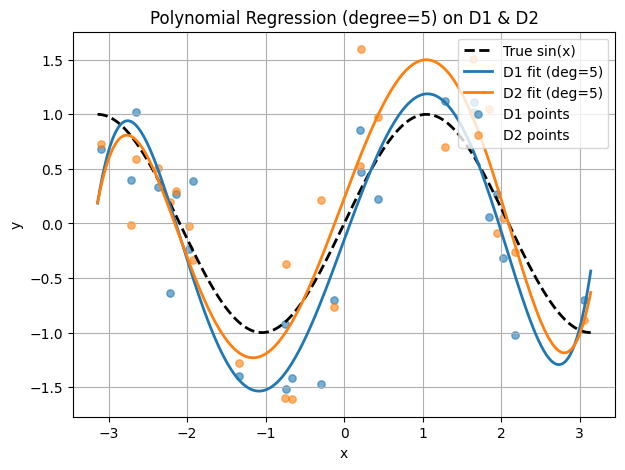

Test MSE (deg=5) — D1: 0.3772 | D2: 0.3887


In [12]:
## Part 2.1 To DO


import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit_poly(X_tr, y_tr, degree):
    X_tr = X_tr.reshape(-1,1)
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    Xd   = poly.fit_transform(X_tr)
    lr   = LinearRegression(fit_intercept=False)
    lr.fit(Xd, y_tr)
    return lr, poly

def predict_poly(model, poly, x):
    Xg = poly.transform(x.reshape(-1,1))
    return model.predict(Xg)

def test_mse(model, poly, Xt, yt):
    Xtd = poly.transform(Xt.reshape(-1,1))
    return mean_squared_error(yt, model.predict(Xtd))

def run_degree(degree):
    # D1
    m1, p1 = fit_poly(X1, y1, degree)
    y1_grid = predict_poly(m1, p1, x_true)
    mse1 = test_mse(m1, p1, Xt, yt)
    # D2
    m2, p2 = fit_poly(X2, y2, degree)
    y2_grid = predict_poly(m2, p2, x_true)
    mse2 = test_mse(m2, p2, Xt, yt)
    # Plot
    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(x_true, y_true, 'k--', lw=2, label='True sin(x)')
    ax.plot(x_true, y1_grid, lw=2, label=f'D1 fit (deg={degree})')
    ax.plot(x_true, y2_grid, lw=2, label=f'D2 fit (deg={degree})')
    ax.scatter(X1, y1, s=28, alpha=0.6, label='D1 points')
    ax.scatter(X2, y2, s=28, alpha=0.6, label='D2 points')
    ax.set_title(f'Polynomial Regression (degree={degree}) on D1 & D2')
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.grid(True); ax.legend()
    plt.show()
    print(f"Test MSE (deg={degree}) — D1: {mse1:.4f} | D2: {mse2:.4f}")

run_degree(3)
run_degree(5)

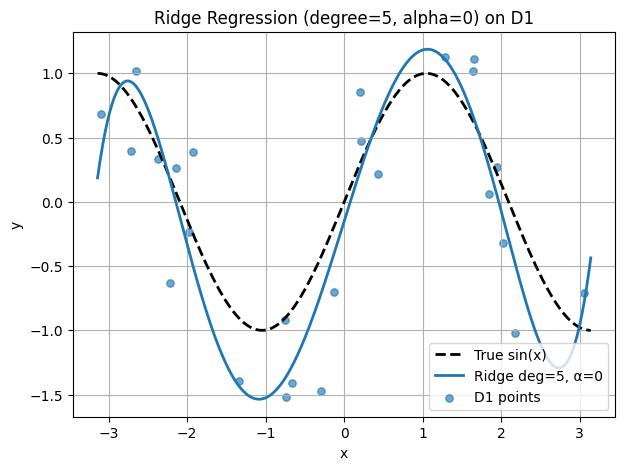

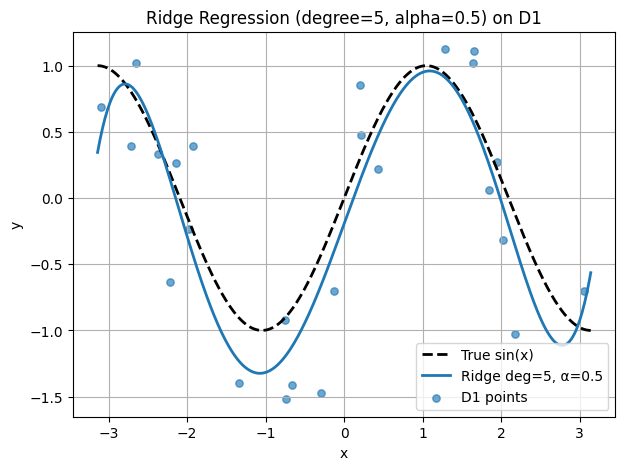

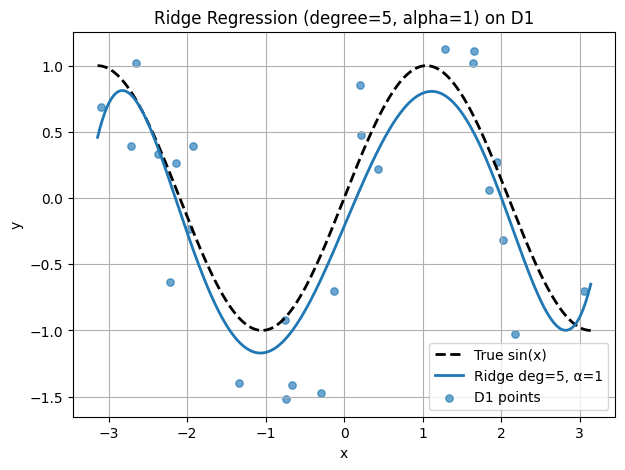

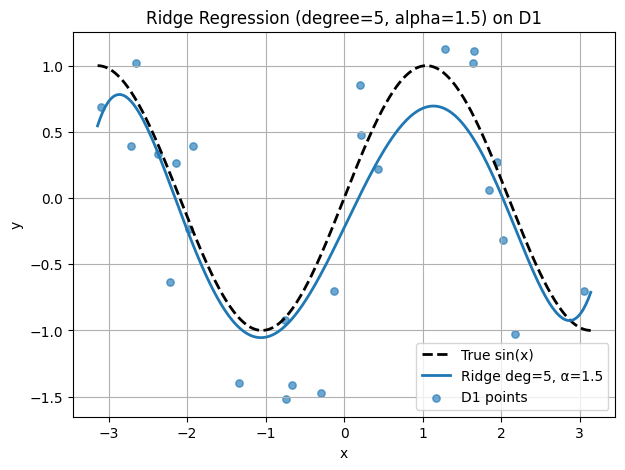

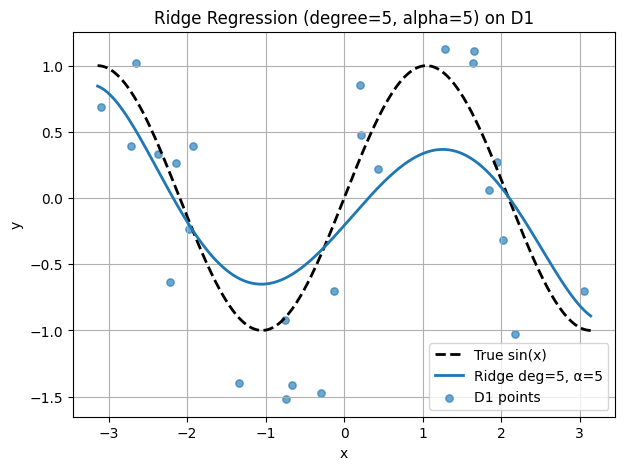

Ridge (degree=5, D1) — MSE Table
 alpha  Train MSE  Test MSE
0.0000     0.1713    0.3772
0.5000     0.1832    0.3026
1.0000     0.2060    0.2762
1.5000     0.2306    0.2698
5.0000     0.3596    0.3222


In [16]:
## Part 2.2 To DO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alphas = [0, 0.5, 1, 1.5, 5]
degree = 5

poly5 = PolynomialFeatures(degree=degree, include_bias=True)
X1d = poly5.fit_transform(X1.reshape(-1,1))
Xtd = poly5.transform(Xt.reshape(-1,1))
Xgd = poly5.transform(x_true.reshape(-1,1))

rows = []
for a in alphas:
    model = Ridge(alpha=a, fit_intercept=False, random_state=0)
    model.fit(X1d, y1)

    y_grid = model.predict(Xgd)
    tr_mse = mean_squared_error(y1, model.predict(X1d))
    te_mse = mean_squared_error(yt, model.predict(Xtd))

    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(x_true, y_true, 'k--', lw=2, label='True sin(x)')
    ax.plot(x_true, y_grid, lw=2, label=f'Ridge deg=5, α={a}')
    ax.scatter(X1, y1, s=28, alpha=0.65, label='D1 points')
    ax.set_title(f'Ridge Regression (degree=5, alpha={a}) on D1')
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.grid(True); ax.legend()
    plt.show()

    rows.append({"alpha": a, "Train MSE": tr_mse, "Test MSE": te_mse})

df_mse = pd.DataFrame(rows).sort_values("alpha").reset_index(drop=True)
print("Ridge (degree=5, D1) — MSE Table")
print(df_mse.to_string(index=False, float_format=lambda v: f"{v:.4f}"))
